<a href="https://colab.research.google.com/github/sugiyama404/ReinfoceLearningForTrading/blob/main/any_and_multiprosess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from concurrent.futures import ThreadPoolExecutor as PoolExecutor
from multiprocessing import Process
from time import sleep
import random
import threading
import time
from multiprocessing import Pool
import random

import matplotlib.pyplot as plt
import seaborn as sns

arr = []

# 通常のループ

In [2]:
class Worker:
    def __init__(self, name):
        self.name = name
        self.num = 0
        self.sum = 0.0

    def run(self):
        while True:
            sleep(1)
            if self.num == 3:
                break
            print('roop_name  = ' + self.name + '  :num ＝ '+ str(self.num) + '  :sum ＝ '+ str(self.sum))
            self.num += 1
            self.sum += random.random()


name = 'nomal-roop'
start = time.time()

for i in range(4):
    w = Worker('roop_point_'+str(i))
    w.run()

end = time.time() - start
arr.append("name:" + name + " process_time:{0}".format(end) + "[s]")

roop_name  = roop_point_0  :num ＝ 0  :sum ＝ 0.0
roop_name  = roop_point_0  :num ＝ 1  :sum ＝ 0.18208334480042954
roop_name  = roop_point_0  :num ＝ 2  :sum ＝ 0.19880255055763585
roop_name  = roop_point_1  :num ＝ 0  :sum ＝ 0.0
roop_name  = roop_point_1  :num ＝ 1  :sum ＝ 0.4397851940096946
roop_name  = roop_point_1  :num ＝ 2  :sum ＝ 0.8531594052613104
roop_name  = roop_point_2  :num ＝ 0  :sum ＝ 0.0
roop_name  = roop_point_2  :num ＝ 1  :sum ＝ 0.9945067275205737
roop_name  = roop_point_2  :num ＝ 2  :sum ＝ 1.7287842359942411
roop_name  = roop_point_3  :num ＝ 0  :sum ＝ 0.0
roop_name  = roop_point_3  :num ＝ 1  :sum ＝ 0.9560686142176196
roop_name  = roop_point_3  :num ＝ 2  :sum ＝ 1.1607757634749303


# マルチスレッド

In [3]:
class Worker(threading.Thread):
    def __init__(self, thread_name):
        self.thread_name = thread_name
        self.num = 0
        self.sum = 0.0
        threading.Thread.__init__(self)

    def run(self):
        while True:
            sleep(1)
            if self.num == 3:
                break
            print('roop_name  = ' + self.thread_name + '  :num ＝ '+ str(self.num) + '  :sum ＝ '+ str(self.sum))

            self.num += 1
            self.sum += random.random()

name = 'multi-thread'
start = time.time()

thread_list = []
for i in range(4):
    thread = Worker('thread_point_'+str(i))
    thread.start()
    thread_list.append(thread)

for thread in thread_list:
    thread.join()

end = time.time() - start
arr.append("name:" + name + " process_time:{0}".format(end) + "[s]")

roop_name  = thread_point_0  :num ＝ 0  :sum ＝ 0.0roop_name  = thread_point_1  :num ＝ 0  :sum ＝ 0.0roop_name  = thread_point_3  :num ＝ 0  :sum ＝ 0.0


roop_name  = thread_point_2  :num ＝ 0  :sum ＝ 0.0
roop_name  = thread_point_3  :num ＝ 1  :sum ＝ 0.024237415127237316
roop_name  = thread_point_1  :num ＝ 1  :sum ＝ 0.7977312958479658roop_name  = thread_point_0  :num ＝ 1  :sum ＝ 0.10636712709537943
roop_name  = thread_point_2  :num ＝ 1  :sum ＝ 0.5560828298418982

roop_name  = thread_point_3  :num ＝ 2  :sum ＝ 0.21156128551997744
roop_name  = thread_point_2  :num ＝ 2  :sum ＝ 0.940763908673918
roop_name  = thread_point_0  :num ＝ 2  :sum ＝ 0.15633142495407482roop_name  = thread_point_1  :num ＝ 2  :sum ＝ 1.3588098300363358



# マルチプロセス

In [4]:
class Worker:
    def __init__(self, name):
        self.name = name
        self.num = 0
        self.sum = 0.0

    def run(self):
        while True:
            sleep(1)
            if self.num == 3:
                break
            print('roop_name  = ' + self.name + '  :num ＝ ' + str(self.num) + '  :sum ＝ ' + str(self.sum))
            self.num += 1
            self.sum += random.random()

name = 'multi-process'
start = time.time()

p_inst = [Worker('work1'),Worker('work2'),Worker('work3'),Worker('work4')]
worker = []
for i in p_inst:
    p = Process(target=i.run,)
    worker.append(p)
    p.start()

for w in worker:
    w.join()

end = time.time() - start
arr.append("name:" + name + " process_time:{0}".format(end) + "[s]")

roop_name  = work1  :num ＝ 0  :sum ＝ 0.0
roop_name  = work2  :num ＝ 0  :sum ＝ 0.0
roop_name  = work3  :num ＝ 0  :sum ＝ 0.0
roop_name  = work4  :num ＝ 0  :sum ＝ 0.0
roop_name  = work1  :num ＝ 1  :sum ＝ 0.9266892316408268
roop_name  = work2  :num ＝ 1  :sum ＝ 0.9939109831915971
roop_name  = work3  :num ＝ 1  :sum ＝ 0.41510049225563994
roop_name  = work4  :num ＝ 1  :sum ＝ 0.501126572792939
roop_name  = work1  :num ＝ 2  :sum ＝ 1.8475592310525246
roop_name  = work2  :num ＝ 2  :sum ＝ 1.8313807751320437
roop_name  = work3  :num ＝ 2  :sum ＝ 1.3613966556716501
roop_name  = work4  :num ＝ 2  :sum ＝ 0.5039114232094323


# ThreadPool

In [5]:
class Worker:
    def __init__(self, name):
        self.name = name
        self.num = 0
        self.sum = 0.0

    def run(self):
        while True:
            sleep(1)
            if self.num == 3:
                break
            print('roop_name  = ' + self.name + '  :num ＝ ' + str(self.num) + '  :sum ＝ ' + str(self.sum))
            self.num += 1
            self.sum += random.random()

name = 'thread-pool'
start = time.time()

thread_num = 4
threads = []
for i in range(thread_num):
    threads.append(Worker(name=f'thread_{i}'))

datas = []
with PoolExecutor(max_workers=thread_num) as executor:
    for worker in threads:
        job = worker.run()
        datas.append(executor.submit(job))

end = time.time() - start
arr.append("name:" + name + " process_time:{0}".format(end) + "[s]")

roop_name  = thread_0  :num ＝ 0  :sum ＝ 0.0
roop_name  = thread_0  :num ＝ 1  :sum ＝ 0.08403203068278664
roop_name  = thread_0  :num ＝ 2  :sum ＝ 0.7413610495407366
roop_name  = thread_1  :num ＝ 0  :sum ＝ 0.0
roop_name  = thread_1  :num ＝ 1  :sum ＝ 0.8994396765332244
roop_name  = thread_1  :num ＝ 2  :sum ＝ 0.9596356457401475
roop_name  = thread_2  :num ＝ 0  :sum ＝ 0.0
roop_name  = thread_2  :num ＝ 1  :sum ＝ 0.11037680282515427
roop_name  = thread_2  :num ＝ 2  :sum ＝ 1.0257120833957822
roop_name  = thread_3  :num ＝ 0  :sum ＝ 0.0
roop_name  = thread_3  :num ＝ 1  :sum ＝ 0.37915997818679414
roop_name  = thread_3  :num ＝ 2  :sum ＝ 0.5103176488507152


In [6]:
for a in arr:
    print(a)

name:nomal-roop process_time:16.02086615562439[s]
name:multi-thread process_time:4.013162136077881[s]
name:multi-process process_time:4.038327932357788[s]
name:thread-pool process_time:16.02269220352173[s]


In [7]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive/')
exp_dir = 'Colab Notebooks/workspace/export/'

process_path = '/content/drive/My Drive/' + exp_dir + 'm_process_random_test.csv'
thread_path = '/content/drive/My Drive/' + exp_dir + 'm_thread_random_test.csv'
df_p = pd.read_csv(process_path)
df_t = pd.read_csv(thread_path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
df_p['WinRate'] = df_p['TradeWin'] / df_p['TradeTimes'] * 100
df_t['WinRate'] = df_t['TradeWin'] / df_t['TradeTimes'] * 100
df_p['FixedProfitRate'] = df_p['FixedProfit'] /1000000 * 100
df_t['FixedProfitRate'] = df_t['FixedProfit'] /1000000 * 100
del df_p['FixedProfit']
del df_p['TradeTimes']
del df_p['TradeWin']
del df_t['FixedProfit']
del df_t['TradeTimes']
del df_t['TradeWin']

df_p

,WinRate,FixedProfitRate
0,58.064516,112.888860
1,58.219178,137.963192
2,60.130719,131.065069
3,61.313869,115.179210
4,62.000000,116.392299
...,...,...
95,64.179104,145.800731
96,56.737589,131.342188
97,59.420290,115.104706
98,58.904110,107.741981


In [9]:
df_a = pd.DataFrame(columns=['MultiThread', 'MultiProcess'])
df_a['MultiThread'] = df_t['FixedProfitRate']
df_a['MultiProcess'] = df_p['FixedProfitRate']

df_b = pd.DataFrame(columns=['MultiProcess'])
df_b['MultiThread'] = df_t['WinRate']
df_b['MultiProcess'] = df_p['WinRate']

dfTa_melt = pd.melt(df_a)
dfTa_melt['species'] = 'FixedProfitRate'

dfAt_melt = pd.melt(df_b)
dfAt_melt['species'] = 'WinRate'

df = pd.concat([dfAt_melt, dfTa_melt], axis=0)
df

,variable,value,species
0,MultiProcess,58.064516,WinRate
1,MultiProcess,58.219178,WinRate
2,MultiProcess,60.130719,WinRate
3,MultiProcess,61.313869,WinRate
4,MultiProcess,62.000000,WinRate
...,...,...,...
195,MultiProcess,145.800731,FixedProfitRate
196,MultiProcess,131.342188,FixedProfitRate
197,MultiProcess,115.104706,FixedProfitRate
198,MultiProcess,107.741981,FixedProfitRate


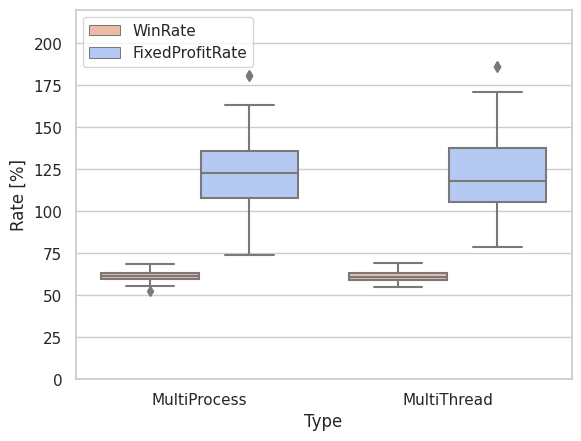

In [10]:
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set3')


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='variable', y='value', data=df, hue='species', palette='coolwarm_r', ax=ax)


ax.set_xlabel('Type')
ax.set_ylabel('Rate [%]')
ax.set_ylim(0, 220)
ax.legend()

plt.show()